In [1]:
import pandas as pd
import numpy as np

### Preparação dos dados

In [2]:
base_census = pd.read_csv(r'D:\CURSOS\UDEMY\Machine Learning com Python\codigos\Bases de dados\census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<Axes: xlabel='income', ylabel='count'>

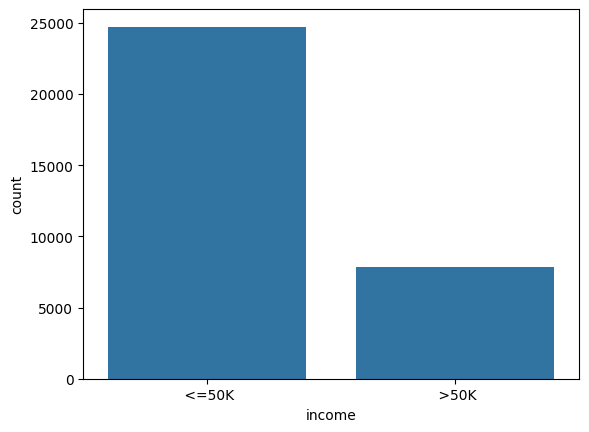

In [4]:
import seaborn as sns 
sns.countplot(x= base_census['income'])

In [6]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [7]:
y_census = base_census.iloc[:, 14]
y_census

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [9]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [10]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

### Subamostragem com Tomek Links

In [11]:
from imblearn.under_sampling import TomekLinks

In [12]:
tl = TomekLinks(sampling_strategy='all')
X_under, y_under = tl.fit_resample(X_census, y_census) #Atualizado 20/05/2022

In [13]:
X_under.shape, y_under.shape

((27763, 14), (27763,))

In [14]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [15]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22321,  5442], dtype=int64))

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X_under_ohe = onehotencorder.fit_transform(X_under).toarray()
X_under_ohe

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [17]:
X_under_ohe.shape, X_under.shape

((27763, 108), (27763, 14))

In [18]:
from sklearn.model_selection import train_test_split
X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((23598, 14), (4165, 14))

In [19]:
# 84.70% com os dados originais
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [20]:

from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8993997599039616

In [21]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8993997599039616

In [22]:
print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.97      0.94      3347
        >50K       0.82      0.63      0.71       818

    accuracy                           0.90      4165
   macro avg       0.86      0.80      0.83      4165
weighted avg       0.89      0.90      0.89      4165



### Sobremostragem com SMOTHE

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
X_census.shape

(32561, 14)

In [25]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census) #Atualizado 20/05/2022

In [26]:
X_over.shape

(49440, 14)

In [27]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [28]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))

In [29]:
from sklearn.model_selection import train_test_split
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [31]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.9088457389428263

In [32]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416



### Seleção de Atributos

#### Preparação da base de dados

In [35]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
colunas = base_census.columns[: -1]
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [40]:
X_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14]

In [41]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [42]:
y_census

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [44]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_census_scaler = scaler.fit_transform(X_census)
X_census_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

##### Low variance

In [49]:
for i in range(X_census.shape[1]):
    #print(i)
    print(X_census_scaler[:, i].var())

0.034913808595952486
0.03312115190663569
0.005138537590667898
0.06657103564450892
0.029416385024073417
0.06301761677301636
0.09123816653931152
0.10326534394406342
0.04502805169292987
0.22136950173699113
0.00545419549240862
0.008557270623428908
0.015874043397822807
0.03641266114220053


In [50]:
from sklearn.feature_selection import VarianceThreshold


In [51]:
selecao = VarianceThreshold(threshold=0.05)
X_census_variancia = selecao.fit_transform(X_census_scaler)
X_census_variancia.shape

(32561, 5)

In [52]:
X_census_variancia

array([[0.6       , 0.66666667, 0.07142857, 0.2       , 1.        ],
       [0.6       , 0.33333333, 0.28571429, 0.        , 1.        ],
       [0.73333333, 0.        , 0.42857143, 0.2       , 1.        ],
       ...,
       [0.73333333, 1.        , 0.07142857, 0.8       , 0.        ],
       [0.73333333, 0.66666667, 0.07142857, 0.6       , 1.        ],
       [0.73333333, 0.33333333, 0.28571429, 1.        , 0.        ]])

In [53]:
selecao.variances_

array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
       0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
       0.0054542 , 0.00855727, 0.01587404, 0.03641266])

In [54]:
indices = np.where(selecao.variances_ > 0.05)
indices

(array([3, 5, 6, 7, 9], dtype=int64),)

In [55]:
colunas[indices]

Index(['education', 'marital-status', 'occupation', 'relationship', 'sex'], dtype='object')

In [56]:
'''''''''''colunas[indices]'''''''''''

"''colunas[indices]"

In [57]:
base_census_variancia = base_census.drop(columns = ['age', 'workclass', 'final-weight',
                                                    'education-num', 'race', 'capital-gain',
                                                    'capital-loos', 'hour-per-week',
                                                    'native-country'], axis = 1)
base_census_variancia

,education,marital-status,occupation,relationship,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,<=50K
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,<=50K
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,<=50K
...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,<=50K
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,>50K
32558,HS-grad,Widowed,Adm-clerical,Unmarried,Female,<=50K
32559,HS-grad,Never-married,Adm-clerical,Own-child,Male,<=50K


In [58]:
X_census_variancia = base_census_variancia.iloc[:,0:5].values
y_census_variancia = base_census_variancia.iloc[:,5].values

In [59]:
X_census_variancia

array([[' Bachelors', ' Never-married', ' Adm-clerical',
        ' Not-in-family', ' Male'],
       [' Bachelors', ' Married-civ-spouse', ' Exec-managerial',
        ' Husband', ' Male'],
       [' HS-grad', ' Divorced', ' Handlers-cleaners', ' Not-in-family',
        ' Male'],
       ...,
       [' HS-grad', ' Widowed', ' Adm-clerical', ' Unmarried', ' Female'],
       [' HS-grad', ' Never-married', ' Adm-clerical', ' Own-child',
        ' Male'],
       [' HS-grad', ' Married-civ-spouse', ' Exec-managerial', ' Wife',
        ' Female']], dtype=object)

In [60]:
y_census_variancia

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [61]:
X_census_variancia[:,0] = label_encoder_education.fit_transform(X_census_variancia[:,0])
X_census_variancia[:,1] = label_encoder_marital.fit_transform(X_census_variancia[:,1])
X_census_variancia[:,2] = label_encoder_occupation.fit_transform(X_census_variancia[:,2])
X_census_variancia[:,3] = label_encoder_relationship.fit_transform(X_census_variancia[:,3])
X_census_variancia[:,4] = label_encoder_sex.fit_transform(X_census_variancia[:,4])

In [62]:
X_census_variancia


array([[9, 4, 1, 1, 1],
       [9, 2, 4, 0, 1],
       [11, 0, 6, 1, 1],
       ...,
       [11, 6, 1, 4, 0],
       [11, 4, 1, 3, 1],
       [11, 2, 4, 5, 0]], dtype=object)

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3,4])],remainder='passthrough')
X_census_variancia = onehotencorder.fit_transform(X_census_variancia).toarray()
X_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [64]:
scaler = MinMaxScaler()
X_census_variancia = scaler.fit_transform(X_census_variancia)
X_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [65]:
from sklearn.model_selection import train_test_split
X_census_treinamento_var, X_census_teste_var, y_census_treinamento_var, y_census_teste_var = train_test_split(X_census_variancia, y_census_variancia, test_size=0.15, random_state=0)
X_census_treinamento_var.shape, X_census_teste_var.shape

((27676, 46), (4885, 46))

In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report
random_forest_var = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_var.fit(X_census_treinamento_var, y_census_treinamento_var)
previsoes = random_forest_var.predict(X_census_teste_var)
accuracy_score(y_census_teste_var, previsoes)

0.816171954964176

In [68]:
previsoes = random_forest_var.predict(X_census_teste_var)
accuracy_score(y_census_teste_var, previsoes)

0.816171954964176

#### Extra Tree

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
selecao = ExtraTreesClassifier()
selecao.fit(X_census_scaler, y_census)

ExtraTreesClassifier()

In [71]:
importancia  = selecao.feature_importances_
importancia

array([0.15554861, 0.04485445, 0.16433096, 0.03546981, 0.08860789,
       0.07075022, 0.07707355, 0.08922208, 0.01472611, 0.02854013,
       0.08959152, 0.02794562, 0.09593064, 0.0174084 ])

In [72]:
importancia.sum()

1.0

In [74]:
indices = []
for i in range(len(importancia)):
    #print(i)
    if importancia[i] > 0.029:
        indices.append(i)




In [75]:
indices

[0, 1, 2, 3, 4, 5, 6, 7, 10, 12]

In [76]:
colunas[indices]

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'capital-gain',
       'hour-per-week'],
      dtype='object')

In [78]:
X_census_extra = X_census[:, indices]
X_census_extra

array([[39, 7, 77516, ..., 1, 2174, 40],
       [50, 6, 83311, ..., 0, 0, 13],
       [38, 4, 215646, ..., 1, 0, 40],
       ...,
       [58, 4, 151910, ..., 4, 0, 40],
       [22, 4, 201490, ..., 3, 0, 20],
       [52, 5, 287927, ..., 5, 15024, 40]], dtype=object)

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7])],remainder='passthrough')
X_census_extra = onehotencorder.fit_transform(X_census_extra).toarray()
X_census_extra

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3000e+01, 2.1740e+03,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3000e+01, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 1.5024e+04,
        4.0000e+01]])

In [80]:
from sklearn.model_selection import train_test_split
X_census_treinamento_extra, X_census_teste_extra, y_census_treinamento_extra, y_census_teste_extra = train_test_split(X_census_extra, y_census, test_size=0.15, random_state=0)
X_census_treinamento_extra.shape, X_census_teste_extra.shape

((27676, 58), (4885, 58))

In [81]:
from sklearn.ensemble import RandomForestClassifier
random_forest_extra = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_extra.fit(X_census_treinamento_extra, y_census_treinamento_extra)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [82]:
# 0.8470
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_extra.predict(X_census_teste_extra)
accuracy_score(y_census_teste_extra, previsoes)

0.8472876151484136